In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


### Step01: Import Required Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Step02: Dataset Load and Data Preprocessing

In [3]:
data = pd.read_csv("data_for_lr.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


### Step03: Splitting Data into Train and Test Sets

In [21]:
X = np.array(data.x).reshape(699, 1)
Y = np.array(data.y).reshape(699, 1)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Step04: Training the Linear Regression Model

In [23]:
# Initialize model
model = LinearRegression()

# Train model
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Step05: Making Predictions

In [24]:
Y_pred = model.predict(X_test)

### Step06: Evaluating Model Performance

Evaluation is done via Loss functions and Cost functions

| Term              | Scope                                                         | Example                                |
| ----------------- | ------------------------------------------------------------- | -------------------------------------- |
| **Loss Function** | Measures the error for **a single** data point or **a batch** | $(y - \hat{y})^2$                      |
| **Cost Function** | Average (or sum) of the loss over the **entire training set** | $\frac{1}{n} \sum (y_i - \hat{y}_i)^2$ |


**Q: What Loss Function is Used in Linear Regression?*
In Linear Regression, the most commonly used loss function is:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
$$

Where:
- $Y_i$  = actual value
- $\hat{Y}_i$ = predicted value
- ${n}$ = number of samples

Another Loss function commonly used is R squared

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

- Ranges from 0 to 1 (or can be negative for a bad model)
- Higher is better (closer predictions to actual)


In [29]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 7.75
R-squared Score: 0.99


| Metric | Value | Interpretation                                      |
| ------ | ----- | --------------------------------------------------- |
| MSE    | 7.75  | Low error (good)                                    |
| R²     | 0.99  | Model explains 99% of the data variance (excellent) |


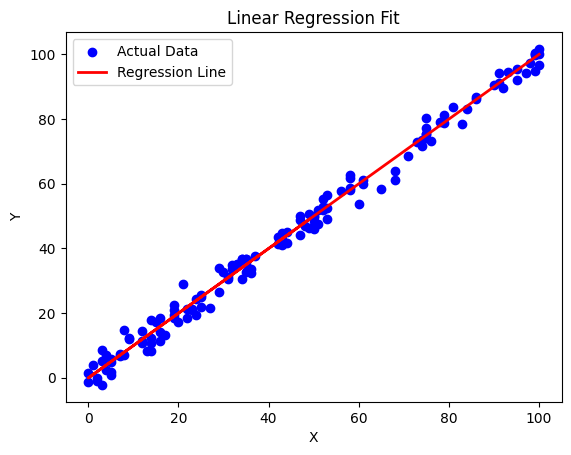

In [27]:
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()